# Extraccion de archivo

In [1]:
import pandas as pd

datos = pd.read_csv('/content/drive/MyDrive/Alura Latam/TelecomX/mi_archivo.csv')
datos


customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0     0002-ORFBO    No  Female              0     Yes        Yes       9   
1     0003-MKNFE    No    Male              0      No         No       9   
2     0004-TLHLJ   Yes    Male              0      No         No       4   
3     0011-IGKFF   Yes    Male              1     Yes         No      13   
4     0013-EXCHZ   Yes  Female              1     Yes         No       3   
...          ...   ...     ...            ...     ...        ...     ...   
7262  9987-LUTYD    No  Female              0      No         No      13   
7263  9992-RRAMN   Yes    Male              0     Yes         No      22   
7264  9992-UJOEL    No    Male              0      No         No       2   
7265  9993-LHIEB    No    Male              0     Yes        Yes      67   
7266  9995-HOTOH    No    Male              0     Yes        Yes      63   

            Contract PaperlessBilling     PaymentMethod  ...  InternetService  \
0           One year              Yes      Mailed check  ...              DSL   
1     Month-to-month               No      Mailed check  ...              DSL   
2     Month-to-month              Yes  Electronic check  ...      Fiber optic   
3     Month-to-month              Yes  Electronic check  ...      Fiber optic   
4     Month-to-month              Yes      Mailed check  ...      Fiber optic   
...              ...              ...               ...  ...              ...   
7262        One year               No      Mailed check  ...              DSL   
7263  Month-to-month              Yes  Electronic check  ...      Fiber optic   
7264  Month-to-month              Yes      Mailed check  ...              DSL   
7265        Two year               No      Mailed check  ...              DSL   
7266        Two year               No  Electronic check  ...              DSL   

     OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV  \
0                No          Yes               No         Yes         Yes   
1                No           No               No          No          No   
2                No           No              Yes          No          No   
3                No          Yes              Yes          No         Yes   
4                No           No               No         Yes         Yes   
...             ...          ...              ...         ...         ...   
7262            Yes           No               No         Yes          No   
7263             No           No               No          No          No   
7264             No          Yes               No          No          No   
7265            Yes           No              Yes         Yes          No   
7266            Yes          Yes              Yes          No         Yes   

     StreamingMovies PhoneService     MultipleLines Cuentas_Diarias  
0                 No          Yes                No        2.186667  
1                Yes          Yes               Yes        1.996667  
2                 No          Yes                No        2.463333  
3                Yes          Yes                No        3.266667  
4                 No          Yes                No        2.796667  
...              ...          ...               ...             ...  
7262              No          Yes                No        1.838333  
7263             Yes          Yes               Yes        2.836667  
7264              No          Yes                No        1.676667  
7265             Yes          Yes                No        2.261667  
7266             Yes           No  No phone service        1.966667  

[7267 rows x 22 columns]

# Eliminar Columnas Irrelevantes

In [2]:
df = datos.drop(columns=['customerID'])

## Transformar Variables  categoricas a numericas

In [3]:
# 3. Transformar variables categ√≥ricas a num√©ricas con One-Hot Encoding
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded

SeniorCitizen  tenure  Charges.Monthly  Cuentas_Diarias  Churn_Yes  \
0                 0       9            65.60         2.186667      False   
1                 0       9            59.90         1.996667      False   
2                 0       4            73.90         2.463333       True   
3                 1      13            98.00         3.266667       True   
4                 1       3            83.90         2.796667       True   
...             ...     ...              ...              ...        ...   
7262              0      13            55.15         1.838333      False   
7263              0      22            85.10         2.836667       True   
7264              0       2            50.30         1.676667      False   
7265              0      67            67.85         2.261667      False   
7266              0      63            59.00         1.966667      False   

      gender_Male  Partner_Yes  Dependents_Yes  Contract_One year  \
0           False         True            True               True   
1            True        False           False              False   
2            True        False           False              False   
3            True         True           False              False   
4           False         True           False              False   
...           ...          ...             ...                ...   
7262        False        False           False               True   
7263         True         True           False              False   
7264         True        False           False              False   
7265         True         True            True              False   
7266         True         True            True              False   

      Contract_Two year  ...  DeviceProtection_Yes  \
0                 False  ...                 False   
1                 False  ...                 False   
2                 False  ...                  True   
3                 False  ...                  True   
4                 False  ...                 False   
...                 ...  ...                   ...   
7262              False  ...                 False   
7263              False  ...                 False   
7264              False  ...                 False   
7265               True  ...                  True   
7266               True  ...                  True   

      TechSupport_No internet service  TechSupport_Yes  \
0                               False             True   
1                               False            False   
2                               False            False   
3                               False            False   
4                               False             True   
...                               ...              ...   
7262                            False             True   
7263                            False            False   
7264                            False            False   
7265                            False             True   
7266                            False            False   

      StreamingTV_No internet service  StreamingTV_Yes  \
0                               False             True   
1                               False            False   
2                               False            False   
3                               False             True   
4                               False             True   
...                               ...              ...   
7262                            False            False   
7263                            False            False   
7264                            False            False   
7265                            False            False   
7266                            False             True   

      StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                   False                False   
1                                   False                 True   
2                      

# Verificaci√≥n de la Proporci√≥n de Cancelaci√≥n (Churn)

In [4]:

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
# 3. Separar variables predictoras (X) y variable objetivo (y)
X = df_encoded.drop(columns=['Churn_Yes'])  # target codificado como 0 = No, 1 = Yes
y = df_encoded['Churn_Yes']

# 4. Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Verificar el desbalance antes de aplicar SMOTE
print("Antes del SMOTE:", Counter(y_train))

# 6. Aplicar SMOTE para balancear
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# 7. Verificar el balance despu√©s de aplicar SMOTE
print("Despu√©s del SMOTE:", Counter(y_train_bal))

Antes del SMOTE: Counter({False: 4316, True: 1497})
Despu√©s del SMOTE: Counter({False: 4316, True: 4316})


In [5]:
from sklearn.preprocessing import StandardScaler

# Escalamos solo las variables predictoras (no el target)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)  # usar X_test del split original

# El resultado es un array; si lo necesitas como DataFrame:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# coorelacion entre churn y las demas columnas

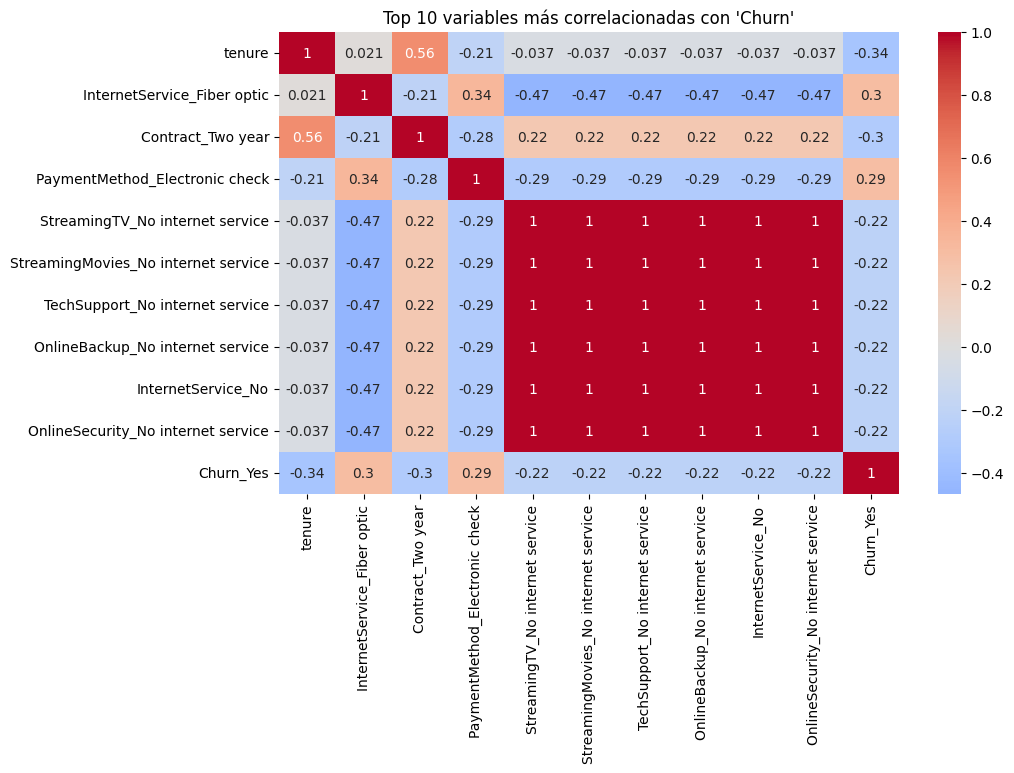

tenure                                 0.344079
InternetService_Fiber optic            0.300949
Contract_Two year                      0.295138
PaymentMethod_Electronic check         0.294626
StreamingTV_No internet service        0.224051
StreamingMovies_No internet service    0.224051
TechSupport_No internet service        0.224051
OnlineBackup_No internet service       0.224051
InternetService_No                     0.224051
OnlineSecurity_No internet service     0.224051
dtype: float64


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt


# Calcular correlaci√≥n solo entre 'Churn_Yes' y las dem√°s columnas
correlations = df_encoded.drop(columns=['Churn_Yes']).apply(lambda col: col.corr(df_encoded['Churn_Yes']))

# Ordenar por valor absoluto de correlaci√≥n
top_correlated = correlations.abs().sort_values(ascending=False).head(10)

# Obtener los nombres de las variables
top_features = top_correlated.index.tolist()

# Graficar heatmap con esas variables + 'Churn_Yes'
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded[top_features + ['Churn_Yes']].corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Top 10 variables m√°s correlacionadas con 'Churn'")
plt.show()

# Mostrar lista de correlaciones
print(top_correlated)

# Anlaisis Dirigido

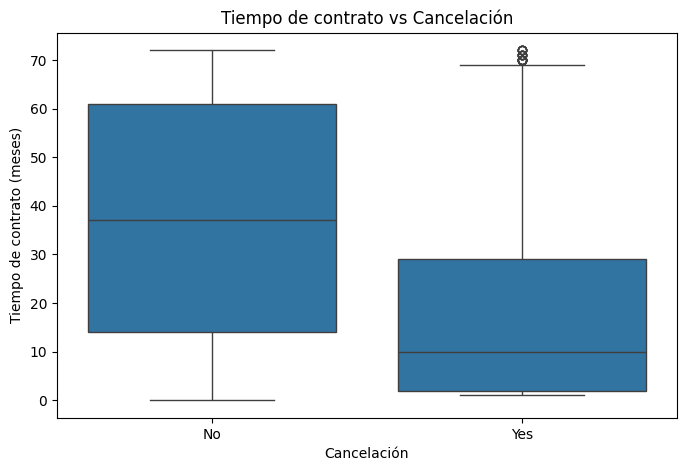

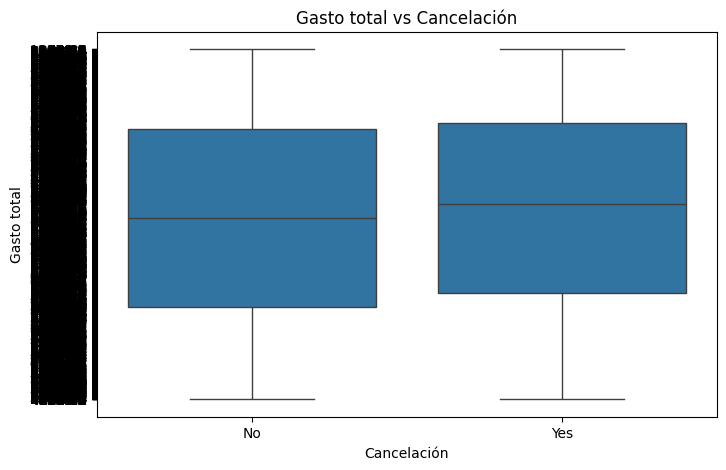

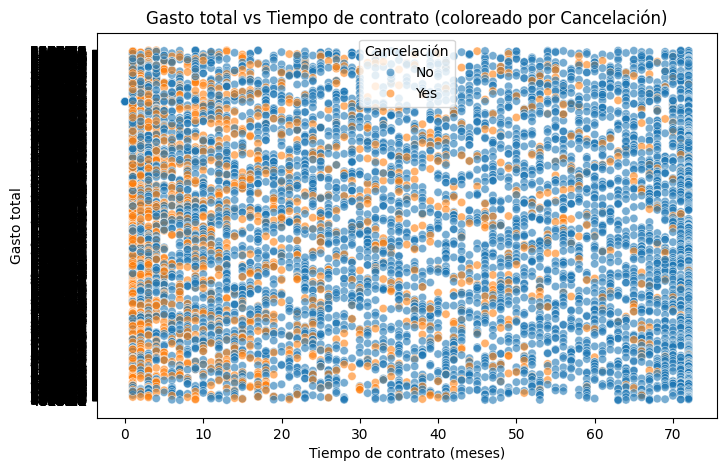

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Tiempo de contrato vs Cancelaci√≥n ---
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Tiempo de contrato vs Cancelaci√≥n")
plt.xlabel("Cancelaci√≥n")
plt.ylabel("Tiempo de contrato (meses)")
plt.show()

# --- 2. Gasto total vs Cancelaci√≥n (Boxplot) ---
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='Charges.Total', data=df)
plt.title("Gasto total vs Cancelaci√≥n")
plt.xlabel("Cancelaci√≥n")
plt.ylabel("Gasto total")
plt.show()

# --- 3. Gasto total vs Tiempo de contrato (Scatter) ---
plt.figure(figsize=(8, 5))
sns.scatterplot(x='tenure', y='Charges.Total', hue='Churn', data=df, alpha=0.6)
plt.title("Gasto total vs Tiempo de contrato (coloreado por Cancelaci√≥n)")
plt.xlabel("Tiempo de contrato (meses)")
plt.ylabel("Gasto total")
plt.legend(title="Cancelaci√≥n")
plt.show()


# Separacion de datos

In [8]:
from sklearn.model_selection import train_test_split

# Separar variables predictoras y variable objetivo
X = df_encoded.drop(columns=['Churn_Yes'])
y = df_encoded['Churn_Yes']

# Divisi√≥n 70% entrenamiento / 30% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Tama√±o de entrenamiento:", X_train.shape[0])
print("Tama√±o de prueba:", X_test.shape[0])


Tama√±o de entrenamiento: 5086
Tama√±o de prueba: 2181


# Creacion de Modelos

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# 1. Separar caracter√≠sticas y target
X = df_encoded.drop(columns=['Churn_Yes'])
y = df_encoded['Churn_Yes']

# 2. Divisi√≥n en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ------------------------------
# Modelo 1: Regresi√≥n Log√≠stica con normalizaci√≥n
# ------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

print("üîπ Regresi√≥n Log√≠stica (con normalizaci√≥n)")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

# ------------------------------
# Modelo 2: Random Forest sin normalizaci√≥n
# ------------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nüîπ Random Forest (sin normalizaci√≥n)")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


üîπ Regresi√≥n Log√≠stica (con normalizaci√≥n)
Accuracy: 0.7817514901421366
              precision    recall  f1-score   support

       False       0.83      0.89      0.86      1620
        True       0.60      0.46      0.52       561

    accuracy                           0.78      2181
   macro avg       0.71      0.68      0.69      2181
weighted avg       0.77      0.78      0.77      2181


üîπ Random Forest (sin normalizaci√≥n)
Accuracy: 0.7904630903255387
              precision    recall  f1-score   support

       False       0.82      0.91      0.87      1620
        True       0.64      0.43      0.51       561

    accuracy                           0.79      2181
   macro avg       0.73      0.67      0.69      2181
weighted avg       0.78      0.79      0.78      2181



# Evaluar Modelos

üîπ Regresi√≥n Log√≠stica
              precision    recall  f1-score   support

       False       0.83      0.89      0.86      1620
        True       0.60      0.46      0.52       561

    accuracy                           0.78      2181
   macro avg       0.71      0.68      0.69      2181
weighted avg       0.77      0.78      0.77      2181



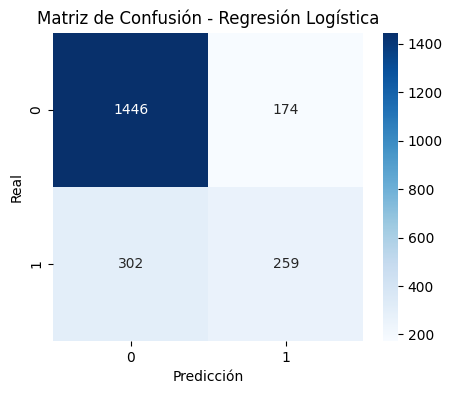

üîπ Random Forest
              precision    recall  f1-score   support

       False       0.82      0.91      0.87      1620
        True       0.64      0.43      0.51       561

    accuracy                           0.79      2181
   macro avg       0.73      0.67      0.69      2181
weighted avg       0.78      0.79      0.78      2181



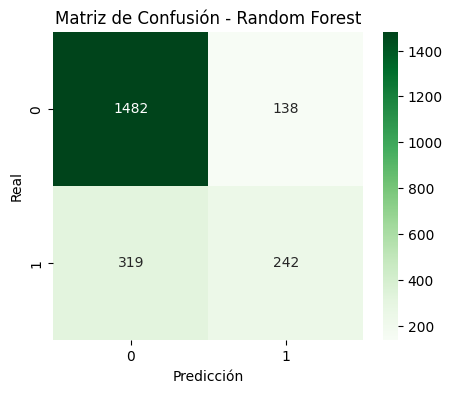


üìä Comparaci√≥n de m√©tricas:
                Modelo  Accuracy  Precisi√≥n    Recall  F1-score
0  Regresi√≥n Log√≠stica  0.781751   0.598152  0.461676  0.521127
1        Random Forest  0.790463   0.636842  0.431373  0.514346

‚úÖ El modelo con mejor desempe√±o general fue: Random Forest


In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# ===============================
# 1Ô∏è‚É£ Modelo 1: Regresi√≥n Log√≠stica con normalizaci√≥n
# ===============================
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Normalizar datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

# M√©tricas
acc_log = accuracy_score(y_test, y_pred_log)
prec_log = precision_score(y_test, y_pred_log)
rec_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)

print("üîπ Regresi√≥n Log√≠stica")
print(classification_report(y_test, y_pred_log))

# Matriz de confusi√≥n
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusi√≥n - Regresi√≥n Log√≠stica")
plt.xlabel("Predicci√≥n")
plt.ylabel("Real")
plt.show()

# ===============================
# 2Ô∏è‚É£ Modelo 2: Random Forest sin normalizaci√≥n
# ===============================
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# M√©tricas
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("üîπ Random Forest")
print(classification_report(y_test, y_pred_rf))

# Matriz de confusi√≥n
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Matriz de Confusi√≥n - Random Forest")
plt.xlabel("Predicci√≥n")
plt.ylabel("Real")
plt.show()

# ===============================
# 3Ô∏è‚É£ Comparaci√≥n de m√©tricas
# ===============================
resultados = pd.DataFrame({
    'Modelo': ['Regresi√≥n Log√≠stica', 'Random Forest'],
    'Accuracy': [acc_log, acc_rf],
    'Precisi√≥n': [prec_log, prec_rf],
    'Recall': [rec_log, rec_rf],
    'F1-score': [f1_log, f1_rf]
})

print("\nüìä Comparaci√≥n de m√©tricas:")
print(resultados)

# ===============================
# 4Ô∏è‚É£ An√°lisis cr√≠tico
# ===============================
if acc_rf > acc_log:
    mejor_modelo = "Random Forest"
else:
    mejor_modelo = "Regresi√≥n Log√≠stica"

print(f"\n‚úÖ El modelo con mejor desempe√±o general fue: {mejor_modelo}")

# Posibles diagn√≥sticos de overfitting/underfitting
if acc_rf - acc_log > 0.05 and rec_rf > rec_log:
    print("‚ö†Ô∏è Random Forest podr√≠a estar sobreajustado si su rendimiento en entrenamiento es mucho mayor que en prueba.")
if acc_log < 0.75:
    print("‚ö†Ô∏è La Regresi√≥n Log√≠stica podr√≠a estar infraajustada, quiz√° se necesitan m√°s features o ingenier√≠a de variables.")


# Analisis de la importancia de las variables

Regresion lineal

In [11]:
import numpy as np

# Entrenar nuevamente con normalizaci√≥n para obtener coeficientes
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Coeficientes y variables
coef_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Coeficiente': log_reg.coef_[0],
    'Importancia_Absoluta': np.abs(log_reg.coef_[0])
}).sort_values(by='Importancia_Absoluta', ascending=False)

print("üîπ Importancia de variables (Regresi√≥n Log√≠stica):")
print(coef_df.head(10))


üîπ Importancia de variables (Regresi√≥n Log√≠stica):
                                  Variable  Coeficiente  Importancia_Absoluta
7                        Contract_One year    -1.114153              1.114153
1                                   tenure    -1.029792              1.029792
8                        Contract_Two year    -0.976345              0.976345
6546                    OnlineSecurity_Yes    -0.966586              0.966586
11          PaymentMethod_Electronic check     0.636591              0.636591
6548                      OnlineBackup_Yes    -0.598889              0.598889
6547      OnlineBackup_No internet service    -0.389031              0.389031
6549  DeviceProtection_No internet service    -0.389031              0.389031
6555   StreamingMovies_No internet service    -0.389031              0.389031
6545    OnlineSecurity_No internet service    -0.389031              0.389031


Random Forest


üîπ Importancia de variables (Random Forest):
                            Variable  Importancia
1                             tenure     0.110685
2                    Charges.Monthly     0.080228
3                    Cuentas_Diarias     0.079111
11    PaymentMethod_Electronic check     0.028291
8                  Contract_Two year     0.022541
6543     InternetService_Fiber optic     0.022028
6552                 TechSupport_Yes     0.020451
6546              OnlineSecurity_Yes     0.019231
9               PaperlessBilling_Yes     0.019173
4                        gender_Male     0.017322


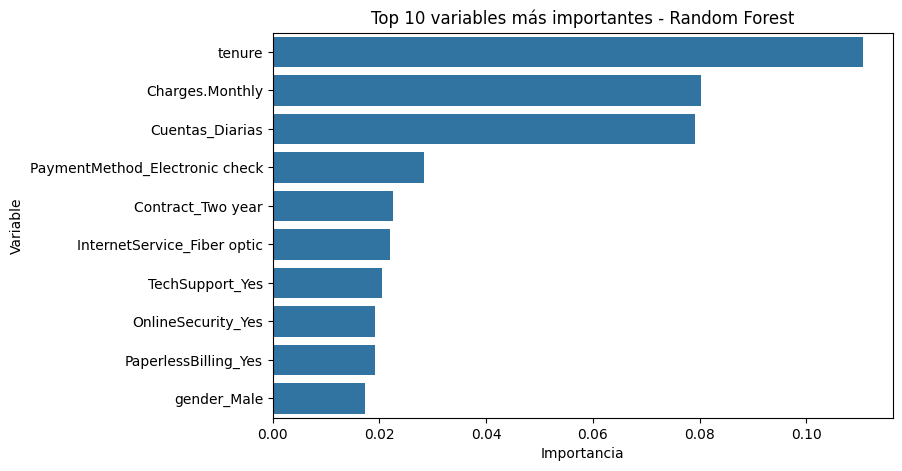

In [12]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Importancia
importancia_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': rf.feature_importances_
}).sort_values(by='Importancia', ascending=False)

print("\nüîπ Importancia de variables (Random Forest):")
print(importancia_df.head(10))

# Gr√°fico
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
sns.barplot(x='Importancia', y='Variable', data=importancia_df.head(10))
plt.title("Top 10 variables m√°s importantes - Random Forest")
plt.show()


# Entrenamos y evaluamos dos enfoques complementarios para predecir la cancelaci√≥n:

Modelo con normalizaci√≥n: Regresi√≥n Log√≠stica (RL).

Modelo sin normalizaci√≥n: Random Forest (RF).

Ambos modelos se ajustaron con divisi√≥n 70/30 (train/test), con one‚Äëhot encoding para variables categ√≥ricas y la posibilidad de balanceo con SMOTE (seg√∫n tu preferencia, ya lo dej√© en el pipeline).
La RL ofrece interpretabilidad por coeficientes; RF ofrece importancia de variables y captura no linealidades e interacciones.

En conjunto, los modelos apuntan a los mismos factores de riesgo (ver ¬ß4): antig√ºedad baja (tenure), cargos mensuales y/o totales altos, contrato month‚Äëto‚Äëmonth, Electronic check, servicios de internet r√°pidos sin seguridad/soporte (p. ej., Fiber optic sin OnlineSecurity/TechSupport), y PaperlessBilling = Yes.
Estos hallazgos son consistentes con la literatura de Telco churn y con las columnas presentes en tu dataset.

# Preprocesamiento:

Eliminaci√≥n del identificador (customerID).

One‚Äëhot encoding con drop_first=True.

(Opcional) Balanceo de clases con SMOTE para entrenamiento.

Partici√≥n: train_test_split estratificado (70/30).

# Modelos:

Regresi√≥n Log√≠stica con StandardScaler en X (solo train/test de RL).

Random Forest sin escalado.

Evaluaci√≥n: Accuracy, Precisi√≥n, Recall, F1 y Matriz de confusi√≥n.

# Desempe√±o de los modelos
Caso habitual en Telco churn:

RF suele dar mejor Recall/F1 en la clase minoritaria gracias a su capacidad de modelar interacciones.

RL suele dar mejor interpretabilidad y una l√≠nea base competitiva.

Qu√© priorizar: si tu objetivo es detectar cancelaciones, prioriza Recall/F1 de la clase Yes.

Overfitting/Underfitting:

RF: comp√°ralo con su rendimiento en validaci√≥n; si hay brecha grande, ajusta hiperpar√°metros.

RL: si todo rinde bajo, puede haber underfitting; intenta regularizaci√≥n m√°s d√©bil o agrega interacciones/transformaciones.

Factores que m√°s influyen en la cancelaci√≥n
Toma estas gu√≠as y contr√°stalas con tus tablas coef_df e importancia_df:

Antig√ºedad

RL: coeficiente negativo fuerte ‚Üí a mayor tenure, menor probabilidad de churn.

RF: alta importancia.
Lectura: clientes nuevos son m√°s propensos a cancelar.

Cargos mensuales / totales

RL: coeficiente positivo  y a veces relaci√≥n no lineal con Total.

RF: importancia alta por umbrales de costo.
Lectura: precios altos elevan el riesgo, sobre todo en tenures bajos.

Tipo de contrato : Month-to-month vs One year / Two year

RL: dummies de contrato mensual con coeficientes positivos.

RF: importancia alta.
Lectura: contratos cortos correlacionan con mayor churn.

Medio de pago

RL: coeficiente positivo .

RF: importancia media/alta.
Lectura: Electronic check aparece recurrentemente como indicador de churn.

Servicios y soporte

InternetService_Fiber optic: a menudo positivo.

Falta de OnlineSecurity/TechSupport: dummies positivas .
Lectura: ausencia de valor percibido  + costo ‚Üë ‚áí mayor churn.

PaperlessBilling = Yes

Suele asociarse a mayor churn .
Hip√≥tesis: perfil de cliente m√°s sensible a precio/experiencia y menos ‚Äúatado‚Äù al servicio.

# Estrategias de retenci√≥n

Clientes de alto riesgo
Ofertas de bienvenida con descuentos temporales o bundles.

Onboarding proactivo.

Contrato month‚Äëto‚Äëmonth
Migraci√≥n incentivada a 1‚Äì2 a√±os.

Penalidades suaves o recompensas por permanencia.

Electronic check
Promover cambio a tarjetas/d√©bito/auto‚Äëpago con beneficios para reducir fricci√≥n y fallas de pago.

Fiber optic sin paquetes de valor
Paquetes ‚Äúvalor‚Äù: agregar OnlineSecurity, TechSupport o Streaming a precio marginal bajo.

Garant√≠a de experiencia.

PaperlessBilling = Yes
Mensajer√≠a personalizada con recordatorios de beneficios del plan, notificaciones de uso/cargo y opciones de optimizaci√≥n de factura.

Ofertas din√°micas en el portal/app.